
## Um conjunto de dados de domínio público para reconhecimento de atividade humana usando smartphones


__Características da base de dados:__   
__Indivíduos__: 30  
__Idades__: 19 a 48 anos  

Seis tipos de atividade:


1.   Caminhar
2.   Subir 
3.   Descer
4.   Sentar
5.   Em pé
6.   Deitar

<p> 70% dos dados são de de treino, 30% são de teste </p>

<p> 
    Os Algoritmos utilizados neste estudo foram:
    
    1.  KNN
    2.  Naive Bayes
    3.  SVM
    
</p>

# KNN 

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

x_train_file = open('/home/giovanna/Documentos/IA/tp02/machine-learning-activities-humans/X_train.txt', 'r')
y_train_file = open('/home/giovanna/Documentos/IA/tp02/machine-learning-activities-humans/y_train.txt', 'r')
x_test_file = open('/home/giovanna/Documentos/IA/tp02/machine-learning-activities-humans/X_test.txt', 'r')
y_test_file = open('/home/giovanna/Documentos/IA/tp02/machine-learning-activities-humans/y_test.txt', 'r')

x_train = []
y_train = []
x_test = []
y_test = []

for x in x_train_file:
    x_train.append([float(ts) for ts in x.split()])
    
for y in y_train_file:
    y_train.append(int(y.rstrip('\n')))
    
for x in x_test_file:
    x_test.append([float(ts) for ts in x.split()])
    
for y in y_test_file:
    y_test.append(int(y.rstrip('\n')))
    
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

def classificador(k):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  return y_pred

# Gerando a Matriz de Confusão com os dados de teste
def matrix_confusion(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  return cm

def metrics (y_test, y_pred):
  ac = accuracy_score(y_test, y_pred)
  rec = recall_score(y_test,y_pred, average= 'weighted')
  prec = precision_score(y_test,y_pred, average='weighted')
  return (ac, rec, prec)

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
   
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel("Atual")
    plt.xlabel("Predito")






# Testes

<p> Os testes executados começaram com o K = 3, e foram aumentando de 3 em 3 até k = 15 </p>

## K = 3

TEMPO DE EXECUÇÃO (função classificador): 25.978222608566284 segundos 

acuracia = 0.8907363420427553 , recall = 0.8907363420427553 , precisao = 0.893559864952592 


[[481   4  11   0   0   0]
 [ 36 422  13   0   0   0]
 [ 49  42 329   0   0   0]
 [  0   3   0 383 105   0]
 [  0   0   0  57 475   0]
 [  0   0   0   1   1 535]]




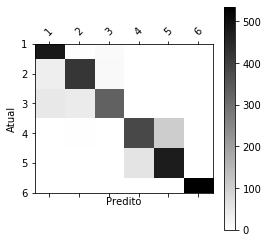

In [4]:
tempo_inicial = time.time()
y_pred = classificador(3)
print("TEMPO DE EXECUÇÃO (função classificador): %s segundos \n" % (time.time() - tempo_inicial))

acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)
print("\n")

cm = matrix_confusion(y_test,y_pred)
print(cm)
print("\n")

df_confusion = pd.crosstab(y_test, y_pred)
plot_confusion_matrix(df_confusion)



## k = 6

TEMPO DE EXECUÇÃO (função classificador): 25.648001670837402 segundos 

acuracia = 0.9012555140821175 , recall = 0.9012555140821175 , precisao = 0.9052271462090213 


[[486   1   9   0   0   0]
 [ 45 421   5   0   0   0]
 [ 55  44 321   0   0   0]
 [  0   4   0 420  67   0]
 [  0   0   0  57 475   0]
 [  0   0   0   3   1 533]]




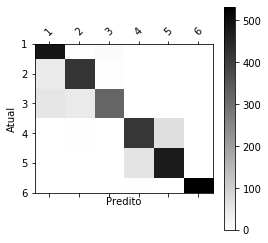

In [5]:
tempo_inicial = time.time()
y_pred = classificador(6)
print("TEMPO DE EXECUÇÃO (função classificador): %s segundos \n" % (time.time() - tempo_inicial))

acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)
print("\n")

cm = matrix_confusion(y_test,y_pred)
print(cm)
print("\n")

df_confusion = pd.crosstab(y_test, y_pred)
plot_confusion_matrix(df_confusion)

## k = 9

TEMPO DE EXECUÇÃO (função classificador): 23.336453437805176 segundos 

acuracia = 0.9053274516457415 , recall = 0.9053274516457415 , precisao = 0.9095208899406916 


[[485   1  10   0   0   0]
 [ 38 429   4   0   0   0]
 [ 47  42 331   0   0   0]
 [  0   4   0 394  93   0]
 [  0   0   0  37 495   0]
 [  0   0   0   2   1 534]]




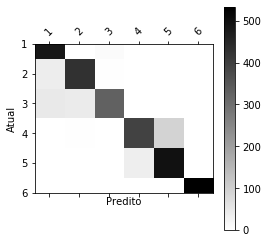

In [6]:
tempo_inicial = time.time()
y_pred = classificador(9)
print("TEMPO DE EXECUÇÃO (função classificador): %s segundos \n" % (time.time() - tempo_inicial))

acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)
print("\n")

cm = matrix_confusion(y_test,y_pred)
print(cm)
print("\n")

df_confusion = pd.crosstab(y_test, y_pred)
plot_confusion_matrix(df_confusion)

## k = 12

TEMPO DE EXECUÇÃO (função classificador): 25.637549877166748 segundos 

acuracia = 0.9029521547336274 , recall = 0.9029521547336274 , precisao = 0.9067368169782795 


[[486   0  10   0   0   0]
 [ 41 424   6   0   0   0]
 [ 52  42 326   0   0   0]
 [  0   4   0 404  83   0]
 [  0   0   0  45 487   0]
 [  0   0   0   2   1 534]]




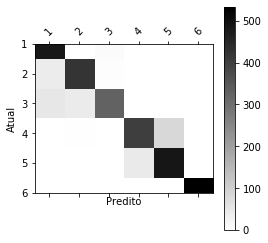

In [7]:
tempo_inicial = time.time()
y_pred = classificador(12)
print("TEMPO DE EXECUÇÃO (função classificador): %s segundos \n" % (time.time() - tempo_inicial))

acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)
print("\n")

cm = matrix_confusion(y_test,y_pred)
print(cm)
print("\n")

df_confusion = pd.crosstab(y_test, y_pred)
plot_confusion_matrix(df_confusion)

## k = 20

TEMPO DE EXECUÇÃO (função classificador): 24.830687522888184 segundos 

acuracia = 0.9046487953851374 , recall = 0.9046487953851374 , precisao = 0.9096494507563135 


[[489   0   7   0   0   0]
 [ 41 426   4   0   0   0]
 [ 53  46 321   0   0   0]
 [  0   4   0 400  87   0]
 [  0   0   0  37 495   0]
 [  0   0   0   1   1 535]]




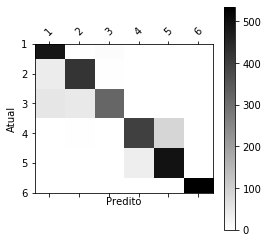

In [8]:
tempo_inicial = time.time()
y_pred = classificador(20)
print("TEMPO DE EXECUÇÃO (função classificador): %s segundos \n" % (time.time() - tempo_inicial))

acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)
print("\n")

cm = matrix_confusion(y_test,y_pred)
print(cm)
print("\n")

df_confusion = pd.crosstab(y_test, y_pred)
plot_confusion_matrix(df_confusion)

## k = 30

TEMPO DE EXECUÇÃO (função classificador): 25.898823499679565 segundos 

acuracia = 0.8992195453003053 , recall = 0.8992195453003053 , precisao = 0.9057301635986735 


[[489   0   7   0   0   0]
 [ 42 427   2   0   0   0]
 [ 56  50 314   0   0   0]
 [  0   4   0 387 100   0]
 [  0   0   0  34 498   0]
 [  0   0   0   1   1 535]]




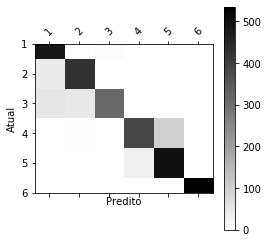

In [9]:
tempo_inicial = time.time()
y_pred = classificador(30)
print("TEMPO DE EXECUÇÃO (função classificador): %s segundos \n" % (time.time() - tempo_inicial))

acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)
print("\n")

cm = matrix_confusion(y_test,y_pred)
print(cm)
print("\n")

df_confusion = pd.crosstab(y_test, y_pred)
plot_confusion_matrix(df_confusion)

# Naive Bayes

acuracia = 0.7702748557855447 , recall = 0.7702748557855447 , precisao = 0.794683370739926 


[[416  38  42   0   0   0]
 [  9 451  11   0   0   0]
 [ 80  83 257   0   0   0]
 [  0   7   0 368 111   5]
 [  0  15   0  54 455   8]
 [  0   3   0 211   0 323]]




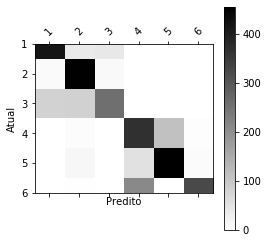

In [10]:
##chamada do modelo
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()  
nb.fit(x_train, y_train)   
y_pred = nb.predict(x_test) 

acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)
print("\n")

cm = matrix_confusion(y_test,y_pred)
print(cm)
print("\n")

df_confusion = pd.crosstab(y_test, y_pred)
plot_confusion_matrix(df_confusion)

# SVM

### Testes
C = 1 , Gamma = 1

TEMPO DE EXECUÇÃO (função classificador): 6.054511070251465 segundos 

acuracia = 0.9640312181879878 , recall = 0.9640312181879878 , precisao = 0.9649392266454911 


[[492   1   3   0   0   0]
 [ 18 451   2   0   0   0]
 [  4   6 410   0   0   0]
 [  0   2   0 435  54   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]




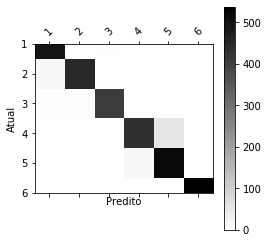

In [20]:
from sklearn import svm

def classificadorSVM():
  # criação de um objeto classificador
  model = svm.SVC(kernel='linear', C=1, gamma=1) 
  model.fit(x_train, y_train)
  #variável recebe os valores preditos para os dados de teste
  y_pred= model.predict(x_test)
  return y_pred

tempo_inicial = time.time()
y_pred = classificadorSVM()
print("TEMPO DE EXECUÇÃO (função classificador): %s segundos \n" % (time.time() - tempo_inicial))

#Metricas de desempenho do modelo
acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)
print("\n")

cm = matrix_confusion(y_test,y_pred)
print(cm)
print("\n")

df_confusion = pd.crosstab(y_test, y_pred)
plot_confusion_matrix(df_confusion)

C = 3 , Gamma = 1

TEMPO DE EXECUÇÃO (função classificador): 6.669413328170776 segundos 

acuracia = 0.9636918900576857 , recall = 0.9636918900576857 , precisao = 0.9648269502213251 


[[492   1   3   0   0   0]
 [ 18 451   2   0   0   0]
 [  4   6 410   0   0   0]
 [  0   2   0 432  57   0]
 [  0   0   0  14 518   0]
 [  0   0   0   0   0 537]]




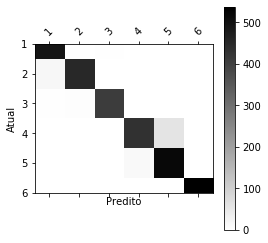

In [21]:
from sklearn import svm

def classificadorSVM():
  # criação de um objeto classificador
  model = svm.SVC(kernel='linear', C=3, gamma=1) 
  model.fit(x_train, y_train)
  #variável recebe os valores preditos para os dados de teste
  y_pred= model.predict(x_test)
  return y_pred

tempo_inicial = time.time()
y_pred = classificadorSVM()
print("TEMPO DE EXECUÇÃO (função classificador): %s segundos \n" % (time.time() - tempo_inicial))

#Metricas de desempenho do modelo
acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)
print("\n")

cm = matrix_confusion(y_test,y_pred)
print(cm)
print("\n")

df_confusion = pd.crosstab(y_test, y_pred)
plot_confusion_matrix(df_confusion)

C=30, Gamma = 40

TEMPO DE EXECUÇÃO (função classificador): 6.858308792114258 segundos 

acuracia = 0.9626739056667798 , recall = 0.9626739056667798 , precisao = 0.9633547420939376 


[[492   1   3   0   0   0]
 [ 18 451   2   0   0   0]
 [  4   6 410   0   0   0]
 [  0   3   0 435  53   0]
 [  0   0   0  20 512   0]
 [  0   0   0   0   0 537]]




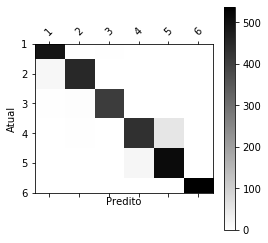

In [26]:
from sklearn import svm

def classificadorSVM():
  # criação de um objeto classificador
  model = svm.SVC(kernel='linear', C=30, gamma=40) 
  model.fit(x_train, y_train)
  #variável recebe os valores preditos para os dados de teste
  y_pred= model.predict(x_test)
  return y_pred

tempo_inicial = time.time()
y_pred = classificadorSVM()
print("TEMPO DE EXECUÇÃO (função classificador): %s segundos \n" % (time.time() - tempo_inicial))

#Metricas de desempenho do modelo
acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)
print("\n")

cm = matrix_confusion(y_test,y_pred)
print(cm)
print("\n")

df_confusion = pd.crosstab(y_test, y_pred)
plot_confusion_matrix(df_confusion)


TEMPO DE EXECUÇÃO (função classificador): 6.676286697387695 segundos 

acuracia = 0.9613165931455717 , recall = 0.9613165931455717 , precisao = 0.9617731776439911 


[[492   1   3   0   0   0]
 [ 18 451   2   0   0   0]
 [  4   6 410   0   0   0]
 [  0   2   0 437  52   0]
 [  0   0   0  26 506   0]
 [  0   0   0   0   0 537]]




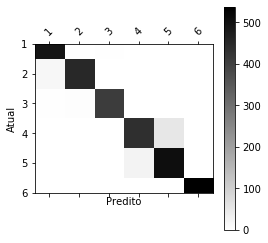

In [28]:
from sklearn import svm

def classificadorSVM():
  # criação de um objeto classificador
  model = svm.SVC(kernel='linear', C=1000) 
  model.fit(x_train, y_train)
  #variável recebe os valores preditos para os dados de teste
  y_pred= model.predict(x_test)
  return y_pred

tempo_inicial = time.time()
y_pred = classificadorSVM()
print("TEMPO DE EXECUÇÃO (função classificador): %s segundos \n" % (time.time() - tempo_inicial))

#Metricas de desempenho do modelo
acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)
print("\n")

cm = matrix_confusion(y_test,y_pred)
print(cm)
print("\n")

df_confusion = pd.crosstab(y_test, y_pred)
plot_confusion_matrix(df_confusion)

# Conclusão

Depois do estudo estudo feito, foi possível concluir que o melhor algoritmo para esse conjunto de dados, entre os 3, é o SVM. Tanto com desempenho, quanto com precisão. O de pior desempenho foi o Naive Bayes, com 79 de precisão.  

